In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
sns.set(style="darkgrid")

In [62]:
def bar_chart(feature):
    df = train.groupby(['Survived', feature]).size().unstack()
    df.index = ['Dead','Survived']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [63]:
gender_submission = pd.read_csv('data/gender_submission.csv')
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Sexo
Cambiamos los valores a numéricos de la columna Sex
- male = 0
- female =1


In [68]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [69]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

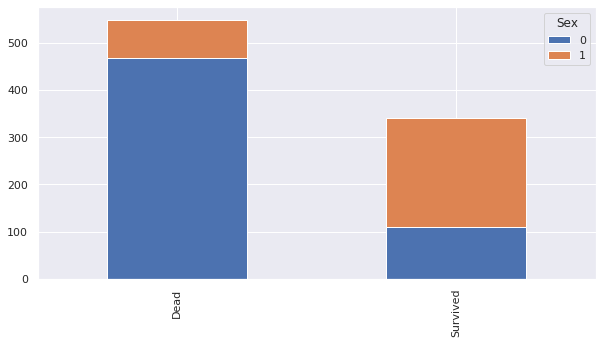

In [70]:
bar_chart('Sex')

En la gráfica de muestra que sobrevivieron más mujeres que hombres.

# Edad
* 1.- Obtener los titulos apartir de los nombres (Mrs., Miss, Mrs, Master..)
* 2.- Obtener la media para llenar los valores vacios en edad

In [71]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

Se agrega mapeo a la columna Title

In [72]:
title_mapping = { "Ms": 1, "Miss": 1,
                  "Mrs": 2,"Mr": 2, "Lady": 2,
                  "Master": 3,  "Rev": 3, "Dr": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                  "Jonkheer": 3,  "Dona" : 3, "Capt": 3,"Mme": 3,"Sir": 3,"Don": 3
                  }
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [73]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [74]:
train["Age"] = train["Age"].apply(np.ceil)
test["Age"]  = test["Age"].apply(np.ceil)

In [75]:
test['Age'].value_counts()

30.0    82
22.0    31
21.0    17
24.0    17
27.0    13
        ..
44.0     1
5.0      1
62.0     1
7.0      1
3.0      1
Name: Age, Length: 62, dtype: int64

Se agrega el rango de las edades
* 1 - Ninos (0-11)
* 2 - Adolecentes(12-17)
* 3 - Jovenes(18-29)
* 4 - Adulto (30-59)
* 5 - Adulto mayor(60 y mas)


In [76]:
def get_range(row):
    age = row['Age']
    if age <= 11:
        return 1
    elif 12 <= age <= 17:
        return 2
    elif 18 <= age <= 29:
        return 3
    elif 30 <= age <= 59:
        return 4
    elif age >= 60:
        return 5 
    

In [77]:
train['RangeAge'] = train.apply (lambda row: get_range(row), axis=1)
test['RangeAge'] = test.apply (lambda row: get_range(row), axis=1)

In [78]:
train.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,RangeAge
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,2,4


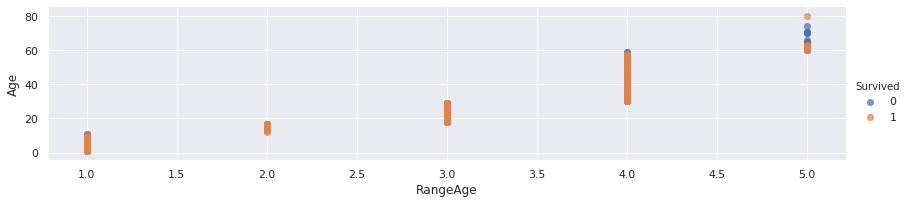

In [79]:
age = sns.FacetGrid(train,hue="Survived",aspect=4)
age.map(plt.scatter,'RangeAge','Age',alpha=.7)
age.add_legend();

En la gráfica podemos ver que sobrevivieron más los adultos y muerieron más adultos mayores.

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    int64  
 12  RangeAge     418 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 42.6+ KB


# Lugar de Embarque

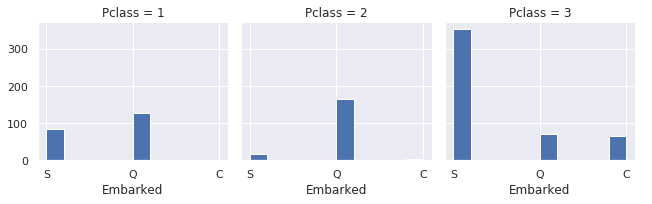

In [81]:
embarque = sns.FacetGrid(train,col="Pclass")
embarque.map(plt.hist,'Embarked')
embarque.add_legend();


* S = 1
* C = 2
* Q = 3

In [82]:
#Llenamos los campos vacios de Embarcación con S
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'] = train['Embarked'].map(embarked_mapping)

test['Embarked'] = test['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].map(embarked_mapping)


# Tarifa

In [83]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,RangeAge
152,1044,3,"Storey, Mr. Thomas",0,61.0,0,0,3701,NaN,NaN,1,2,5


In [84]:
# Se llenan las tarifas faltantes con la media por clase
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

Eliminamos los valores con cero, con los rangos de tarifa por clase
* Primera Clase 512-113
* Segunda Clase 75
* Tercera Clase 70-30

In [85]:
minFare = train['Fare'].min()
train[train['Fare']==minFare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,RangeAge
179,180,0,3,"Leonard, Mr. Lionel",0,36.0,0,0,LINE,0.0,NaN,1,2,4
263,264,0,1,"Harrison, Mr. William",0,40.0,0,0,112059,0.0,B94,1,2,4
271,272,1,3,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0,NaN,1,2,3
277,278,0,2,"Parkes, Mr. Francis ""Frank""",0,31.0,0,0,239853,0.0,NaN,1,2,4
302,303,0,3,"Johnson, Mr. William Cahoone Jr",0,19.0,0,0,LINE,0.0,NaN,1,2,3
413,414,0,2,"Cunningham, Mr. Alfred Fleming",0,31.0,0,0,239853,0.0,NaN,1,2,4
466,467,0,2,"Campbell, Mr. William",0,31.0,0,0,239853,0.0,NaN,1,2,4
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",0,31.0,0,0,239854,0.0,NaN,1,2,4
597,598,0,3,"Johnson, Mr. Alfred",0,49.0,0,0,LINE,0.0,NaN,1,2,4
633,634,0,1,"Parr, Mr. William Henry Marsh",0,31.0,0,0,112052,0.0,NaN,1,2,4


In [86]:
def get_fare(row):
    pClass = row['Pclass']
    fare = row['Fare']
    if fare != 0:
        return fare
    else:
        if pClass == 1:
            return 113.00
        elif pClass == 2:
            return 75.00
        elif pClass == 3:
            return 30.00
    

In [87]:
train['Fare'] = train.apply (lambda row: get_fare(row), axis=1)
test['Fare'] = test.apply (lambda row: get_fare(row), axis=1)

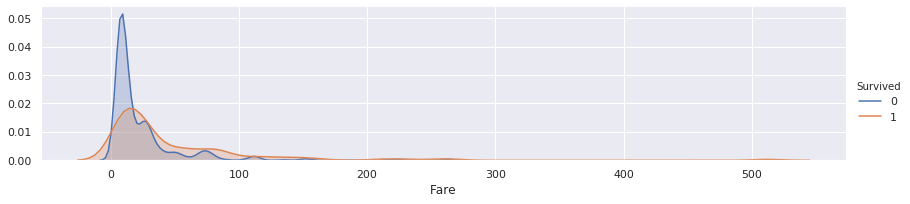

In [88]:
tarifa = sns.FacetGrid(train, hue="Survived",aspect=4)
tarifa.map(sns.kdeplot,'Fare',shade= True)
tarifa.add_legend();

En la gráfica se muesta que murieron más los que pagaron menos

# Cabina

In [89]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

In [90]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [91]:
cabin_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 7}

train['Cabin'] = train['Cabin'].map(cabin_mapping)
test['Cabin'] = test['Cabin'].map(cabin_mapping)

In [92]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

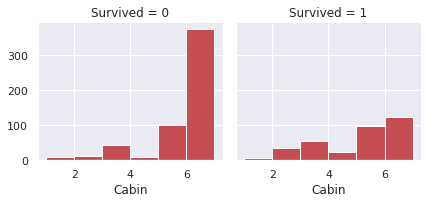

In [93]:
bins = np.arange(1, 8)
cabina = sns.FacetGrid(train,col="Survived")
cabina.map(plt.hist,'Cabin',bins=bins, color="r")
cabina.add_legend();

# Miembros de la familia

In [94]:
train["FamilyMembers"] = train["SibSp"] + train["Parch"] + 1
test["FamilyMembers"] = test["SibSp"] + test["Parch"] + 1

# Ticket

In [95]:
#Ticket
def get_ticket(row):
    ticket = row['Ticket']
    splitC = ticket.split(' ')
    for s in splitC:
        if s.isnumeric():
            return s
    return 0
    

In [96]:
train['Ticket'] = train.apply (lambda row: get_ticket(row), axis=1)
test['Ticket'] = test.apply (lambda row: get_ticket(row), axis=1)

In [97]:
column_drop = ['Name', 'SibSp', 'Parch']
train = train.drop(column_drop, axis=1)
test = test.drop(column_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [98]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [99]:
test

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,RangeAge,FamilyMembers
0,892,3,0,35.0,330911,7.8292,6.0,3,2,4,1
1,893,3,1,47.0,363272,7.0000,6.0,1,2,4,2
2,894,2,0,62.0,240276,9.6875,6.0,3,2,5,1
3,895,3,0,27.0,315154,8.6625,6.0,1,2,3,1
4,896,3,1,22.0,3101298,12.2875,6.0,1,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,3236,8.0500,6.0,1,2,4,1
414,1306,1,1,39.0,17758,108.9000,3.0,2,3,4,1
415,1307,3,0,39.0,3101262,7.2500,6.0,1,2,4,1
416,1308,3,0,30.0,359309,8.0500,6.0,1,2,4,1


# Modelado

### Cross Validacion

In [100]:
k_cv = KFold(n_splits=10, shuffle=True, random_state=0)

### Decision Tree

In [101]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_cv, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.79775281 0.78651685 0.7752809  0.75280899 0.79775281
 0.80898876 0.80898876 0.74157303 0.76404494]


In [102]:
print(round(np.mean(score)*100, 2))

78.11


### Ramdom Forest

In [103]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_cv, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.84269663 0.76404494 0.83146067 0.83146067 0.84269663
 0.86516854 0.79775281 0.80898876 0.78651685]


In [104]:
print(round(np.mean(score)*100, 2))

81.82


### Naive Bayes

In [105]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_cv, n_jobs=1, scoring=scoring)
print(score)

[0.65555556 0.69662921 0.66292135 0.61797753 0.69662921 0.68539326
 0.65168539 0.69662921 0.59550562 0.60674157]


In [106]:
print(round(np.mean(score)*100, 2))

65.66


### SVC

In [107]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_cv, n_jobs=1, scoring=scoring)
print(score)

[0.56666667 0.66292135 0.65168539 0.59550562 0.69662921 0.65168539
 0.59550562 0.65168539 0.56179775 0.52808989]


In [108]:
print(round(np.mean(score)*100,2))

61.62


# Solución

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Sex            418 non-null    int64  
 3   Age            418 non-null    float64
 4   Ticket         418 non-null    object 
 5   Fare           418 non-null    float64
 6   Cabin          418 non-null    float64
 7   Embarked       418 non-null    int64  
 8   Title          418 non-null    int64  
 9   RangeAge       418 non-null    int64  
 10  FamilyMembers  418 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 36.0+ KB


In [110]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [111]:
solution = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

In [112]:
solution.to_csv("result.csv",index=False)